In [1]:
from shapely.geometry import Point, Polygon
import shapely.speedups
shapely.speedups.enable()

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fp = "../data/shapefiles/gz_2010_us_050_00_20m.shp"
polys = gpd.read_file(fp, bbox=[-140.0, 50.0, -110.0, 20.0])

In [3]:
# polys = polys.loc[polys['linetype']=='County']
southern = polys.loc[polys['NAME']=='Santa Barbara']
southern.reset_index(drop=True, inplace=True)

In [4]:
filename = '../data/ENTLN/ENTLN_flashes_-_UC_Santa_Barbara_030419_00UTC_to_030819_00UTC_flash_combined.csv'
df = pd.read_csv(filename, header=0, parse_dates=['timestamp'])
df['freq'] = df.icmultiplicity + df.cgmultiplicity
df.head()

,type,timestamp,latitude,longitude,peakcurrent,icheight,numbersensors,icmultiplicity,cgmultiplicity,starttime,endtime,duration,ullatitude,ullongitude,lrlatitude,lrlongitude,freq
0,40,2019-03-04 17:08:59.815963030,28.9094,-129.9448,-33509,0,5,0,1,2019-03-04T17:08:59.815963030,2019-03-04T17:08:59.815963030,0.0,28.9094,-129.9448,28.9094,-129.9448,1
1,40,2019-03-04 17:08:59.825607061,28.8665,-130.0021,-45497,0,5,0,1,2019-03-04T17:08:59.825607061,2019-03-04T17:08:59.825607061,0.0,28.8665,-130.0021,28.8665,-130.0021,1
2,40,2019-03-04 17:08:59.825607061,28.8665,-130.0021,-45497,0,5,0,1,2019-03-04T17:08:59.825607061,2019-03-04T17:08:59.825607061,0.0,28.8665,-130.0021,28.8665,-130.0021,1
3,40,2019-03-04 17:09:00.562454939,28.2649,-133.2785,-51630,0,5,0,1,2019-03-04T17:09:00.562454939,2019-03-04T17:09:00.562454939,0.0,28.2649,-133.2785,28.2649,-133.2785,1
4,40,2019-03-04 17:09:00.562454939,28.2649,-133.2785,-51630,0,5,0,1,2019-03-04T17:09:00.562454939,2019-03-04T17:09:00.562454939,0.0,28.2649,-133.2785,28.2649,-133.2785,1


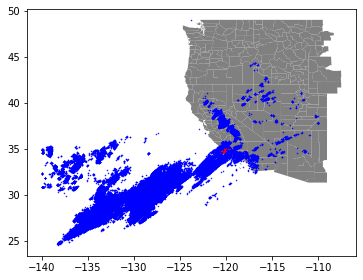

In [76]:
## All lightning
fig, ax = plt.subplots()
polys.plot(ax=ax, facecolor='gray');
southern.plot(ax=ax, facecolor='red');
ax.plot(df.longitude, df.latitude, 'b.', markersize=1)
plt.tight_layout();

In [91]:
#greater than the start date and smaller than the end date
mask = (df['timestamp'] >= '2019-03-05-12') & (df['timestamp'] <= '2019-03-06-18')
space_mask = (df['latitude'] >=30.) & (df['latitude'] <=37.0) & (df['longitude'] >= -130.) & (df['longitude'] <=-115.)
lightning_event = df.loc[mask&space_mask]
print('Total # of lightning pulses in 30 hours of event:', lightning_event.freq.sum())
print('Total # of lightning flashes in 30 hours of event:', lightning_event.freq.count())

Total # of lightning pulses in 30 hours of event: 85032
Total # of lightning flashes in 30 hours of event: 46222


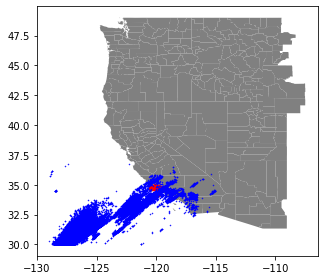

In [92]:
## Lightning during 30 hour AR event
fig, ax = plt.subplots()
polys.plot(ax=ax, facecolor='gray');
southern.plot(ax=ax, facecolor='red');
ax.plot(lightning_event.longitude, lightning_event.latitude, 'b.', markersize=1)
plt.tight_layout();

In [89]:
## check lightning statistics on March 6
time_mask = (df['timestamp'] >= '2019-03-06-00') & (df['timestamp'] <= '2019-03-07-00')
space_mask = (df['latitude'] >=30.) & (df['latitude'] <=37.0) & (df['longitude'] >= -130.) & (df['longitude'] <=-115.)
mar6_mask = time_mask & space_mask
mar6_lightning = df.loc[mar6_mask]
print('Total # of lightning pulses in 30 hours of event:', mar6_lightning.freq.sum())
print('Total # of lightning flashes in 30 hours of event:', mar6_lightning.freq.count())

Total # of lightning pulses in 30 hours of event: 35603
Total # of lightning flashes in 30 hours of event: 8811


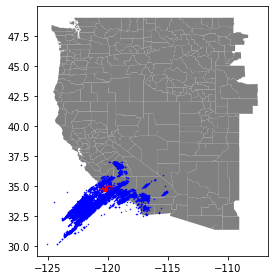

In [90]:
## lightning on March 6
fig, ax = plt.subplots()
polys.plot(ax=ax, facecolor='gray');
southern.plot(ax=ax, facecolor='red');
ax.plot(mar6_lightning.longitude, mar6_lightning.latitude, 'b.', markersize=1)
plt.tight_layout();

In [6]:
gdf = gpd.GeoDataFrame(df.drop(['longitude', 'latitude'], axis=1),
                                crs={'init': 'epsg:4326'},
                                geometry=[shapely.geometry.Point(xy) for xy in zip(df.longitude, df.latitude)])

In [7]:
# Let’s check which Points are within the southern Polygon. 
# Notice, that here we check if the Points are within the geometry of the southern GeoDataFrame. 
# Hence, we use the loc[0, 'geometry'] to parse the actual Polygon geometry object from the 
# GeoDataFrame.
pip_mask = gdf.within(southern.loc[0, 'geometry'])
pip_data = gdf.loc[pip_mask]
pip_data

,type,timestamp,peakcurrent,icheight,numbersensors,icmultiplicity,cgmultiplicity,starttime,endtime,duration,ullatitude,ullongitude,lrlatitude,lrlongitude,freq,geometry
200580,0,2019-03-05 20:09:47.361315012,-41941,0,20,0,2,2019-03-05T20:09:47.140855074,2019-03-05T20:09:47.361315012,0.220460,34.59332,-119.69434,34.57439,-119.70252,2,POINT (-119.69434 34.57439)
202478,0,2019-03-06 03:43:03.631000280,-26611,0,12,3,4,2019-03-06T03:43:03.612763882,2019-03-06T03:43:04.202722073,0.589958,34.62605,-119.57905,34.55276,-119.66382,7,POINT (-119.61065 34.62605)
202524,0,2019-03-06 03:43:48.713365793,-76140,0,11,0,1,2019-03-06T03:43:48.713365793,2019-03-06T03:43:48.713365793,0.000000,34.61235,-119.56067,34.61235,-119.56067,1,POINT (-119.56067 34.61235)
202525,1,2019-03-06 03:43:48.702890635,-4467,9469,10,1,0,2019-03-06T03:43:48.702890635,2019-03-06T03:43:48.702890635,0.000000,34.60489,-119.55546,34.60489,-119.55546,1,POINT (-119.55546 34.60489)
202555,0,2019-03-06 03:44:21.828718901,-51113,0,13,1,4,2019-03-06T03:44:21.828718901,2019-03-06T03:44:21.964694262,0.135975,34.65738,-119.52990,34.63637,-119.58279,5,POINT (-119.55353 34.64514)
202590,0,2019-03-06 03:45:01.308842659,-54446,0,12,1,6,2019-03-06T03:45:01.301225424,2019-03-06T03:45:01.520093203,0.218868,34.65534,-119.54426,34.62254,-119.57774,7,POINT (-119.56097 34.64887)
202592,1,2019-03-06 03:45:02.261705875,-13696,9193,5,1,0,2019-03-06T03:45:02.261705875,2019-03-06T03:45:02.261705875,0.000000,34.63779,-119.66979,34.63779,-119.66979,1,POINT (-119.66979 34.63779)
202593,1,2019-03-06 03:45:02.474046707,-5183,17270,8,1,0,2019-03-06T03:45:02.474046707,2019-03-06T03:45:02.474046707,0.000000,34.73136,-119.59524,34.73136,-119.59524,1,POINT (-119.59524 34.73136)
202615,0,2019-03-06 03:45:28.795166492,-50471,0,13,1,4,2019-03-06T03:45:28.637878656,2019-03-06T03:45:28.795166492,0.157288,34.66137,-119.53117,34.63339,-119.56504,5,POINT (-119.56213 34.64988)
202617,0,2019-03-06 03:45:34.241861105,-48910,0,11,0,1,2019-03-06T03:45:34.241861105,2019-03-06T03:45:34.241861105,0.000000,34.65713,-119.56266,34.65713,-119.56266,1,POINT (-119.56266 34.65713)


In [8]:
print('Total # of CG pulses over storm event:', pip_data.cgmultiplicity.sum())
print('Total # of IC pulses over storm event:', pip_data.icmultiplicity.sum())

Total # of CG pulses over storm event: 535
Total # of IC pulses over storm event: 953


In [9]:
daymask = (df['timestamp'] >= '2019-03-06-00') & (df['timestamp'] < '2019-03-07-00')
march6_lightning_SB = pip_data.loc[daymask]

print('Total # of CG pulses over SB County 6 March:', march6_lightning_SB.cgmultiplicity.sum())
print('Total # of IC pulses over SB County 6 March:', march6_lightning_SB.icmultiplicity.sum())

Total # of CG pulses over SB County 6 March: 533
Total # of IC pulses over SB County 6 March: 953


In [10]:
pip_data.loc[pip_data['peakcurrent'].idxmax()]

type                                           0
timestamp          2019-03-06 05:48:35.754967213
peakcurrent                               127212
icheight                                       0
numbersensors                                  9
icmultiplicity                                 0
cgmultiplicity                                 1
starttime          2019-03-06T05:48:35.754967213
endtime            2019-03-06T05:48:35.754967213
duration                                       0
ullatitude                               34.5933
ullongitude                             -119.794
lrlatitude                               34.5933
lrlongitude                             -119.794
freq                                           1
geometry              POINT (-119.79382 34.5933)
Name: 210697, dtype: object

In [11]:
pip_data.loc[pip_data['peakcurrent'].idxmin()]

type                                           0
timestamp          2019-03-06 04:06:23.013064861
peakcurrent                              -223036
icheight                                       0
numbersensors                                 12
icmultiplicity                                 0
cgmultiplicity                                 2
starttime          2019-03-06T04:06:23.013064861
endtime            2019-03-06T04:06:23.040993929
duration                                0.027929
ullatitude                                34.618
ullongitude                             -119.522
lrlatitude                               34.6122
lrlongitude                             -119.527
freq                                           2
geometry             POINT (-119.52212 34.61803)
Name: 203948, dtype: object

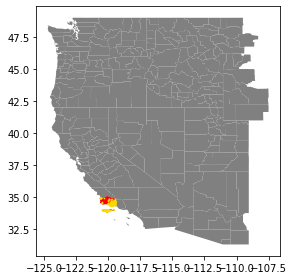

In [12]:
fig, ax = plt.subplots()
polys.plot(ax=ax, facecolor='gray');
southern.plot(ax=ax, facecolor='red');
pip_data.plot(ax=ax, color='gold', markersize=0.5);
plt.tight_layout();